#A4 Report
#Jessica Ro

##Working with the two research questions
The purpose of our reserach project is to explore the adaption process of second-generation immigrant children in America. The dataset was retrieved from the Chidlren of Immigrants Longitudinal study that was done to observe the adaptation process of second-generation immigrants from 1991 to 2006, where immigrant children were interviewed at three stages of their lives at an average of 14, 17, and 24. Data was collected through face-to-face interviews and paper and pencil interviews. I explored data set for children with average age of 24 which were shown at column v400 to v450. I explored the data with mind of questions "What specific factors, if there were any, showed the highest correlations with educational attainment?" and "does sepaking English give greater mobility to family?".

In [10]:

# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from urllib.request import urlopen
from scipy.stats import ttest_ind # t-tests
from scipy import stats
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
import statsmodels.api as sm
import statsmodels.formula.api as amf

matplotlib.style.use('ggplot')
%matplotlib inline 

In [11]:
#Read data
df = pd.read_csv('data/20520-0001-Data.tsv', sep='\t');



#Extract Third Phase Data from whole dataset (v400~v450 + CaseID)
df_thirdPhase = df.loc[:, 'v400':'CASEID']
df_thirdPhase['parentsScore'] = df['p144']
df_thirdPhase['ParentSpeak'] = df['p28a']
df_thirdPhase['ParentUnderstand'] = df['p28b']
df_thirdPhase['ParentRead'] = df['p28c']
df_thirdPhase['ParentWrite'] = df['p28d']





#drop rows that are not for Third Phase (v400 == 0 are responses not for Third Phase)
df_thirdPhase = df_thirdPhase[df_thirdPhase['v400'] == 1]


//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,15,16,18,19,21,22,23,24,25,51,67,101,107,115,117,119,121,123,129,135,136,137,522,524,542,545,611,663) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:

#Changing column names
df_needed = df_thirdPhase[['parentsScore','ParentSpeak', 'ParentUnderstand', 'ParentRead', 'ParentWrite', 'v407a', 'v415e', 'v428b', 'v429a','v429b', 'v429c','v429d',  'v431', 'v433', 'v434', 'v435', 'v444', 'v445', 'v447', 'CASEID']];
df_needed.columns = ['ParentsScore', 'ParentSpeak', 'ParentUnderstand', 'ParentRead', 'ParentWrite', 'Highest_academic_years', 'curJobScore' ,'non_English_understandability','English_speakability','English_understandability','English_readability','English_writability', 'most spoken language','race', 'race identity importance', 'felt_discrimination',  'visits to parents country', 'lived in parents country', 'home country', 'caseid']
'''
#
for index, row in df_three.iterrows():
    print(row['ParentsScore'])
print()
'''
df_three = df_needed[(df_needed.curJobScore != ' ')  & (df_needed.ParentsScore != ' ')]


df_three['curJobScore'] = pd.to_numeric(df_three['curJobScore'], errors='coerce')
df_three['ParentsScore'] = pd.to_numeric(df_three['ParentsScore'], errors='coerce')
df_three['English_speakability'] = pd.to_numeric(df_three['English_speakability'], errors='coerce')
df_three['English_understandability'] = pd.to_numeric(df_three['English_understandability'], errors='coerce')
df_three['English_readability'] = pd.to_numeric(df_three['English_readability'], errors='coerce')
df_three['English_writability'] = pd.to_numeric(df_three['English_writability'], errors='coerce')


df_three['ParentWrite'] = pd.to_numeric(df_three['ParentWrite'], errors='coerce')
df_three['ParentSpeak'] = pd.to_numeric(df_three['ParentSpeak'], errors='coerce')
df_three['ParentUnderstand'] = pd.to_numeric(df_three['ParentUnderstand'], errors='coerce')
df_three['ParentRead'] = pd.to_numeric(df_three['ParentRead'], errors='coerce')

df_three = df_three[np.isfinite(df_three['ParentWrite'])]
df_three = df_three[np.isfinite(df_three['ParentRead'])]
df_three = df_three[np.isfinite(df_three['ParentSpeak'])]
df_three = df_three[np.isfinite(df_three['ParentUnderstand'])]



df_three['diff'] = df_three.curJobScore - df_three.ParentsScore
df_three['English'] = (df_three.English_writability + df_three.English_readability + df_three.English_understandability + df_three.English_speakability) / 4
df_three['ParentEnglish'] = (df_three.ParentRead + df_three.ParentUnderstand + df_three.ParentSpeak + df_three.ParentWrite) / 4
print(df_three)


'''
df_three = df_needed[df_needed['ParentsScore'] != ' ']
df_three = df_needed[df_needed['curJobScore'] != ' ']
df_three = pd.to_numeric(df_three['curJobScore'], errors='coerce')
#df_three = pd.to_numeric(df_three['ParentsScore'], errors='coerce')
#df_three = pd.to_numeric(df_three['English_speakability'], errors='coerce')
#df_three = pd.to_numeric(df_three['English_understandability'], errors='coerce')
#df_three = pd.to_numeric(df_three['English_readability'], errors='coerce')
#df_three = pd.to_numeric(df_three['English_writability'], errors='coerce')

'''




#Dropping empty values for Highest_academic_years
df_dropped = df_needed[df_needed['Highest_academic_years']!= ' ']

#Adding a column of general Language_understandability
df_dropped = df_dropped[df_dropped['English_understandability'] != ' ']
df_dropped = df_dropped[df_dropped['non_English_understandability'] != ' ']
    
df_dropped['English_understandability'] = pd.to_numeric(df_dropped['English_understandability'] , errors='coerce')
df_dropped['non_English_understandability'] = pd.to_numeric(df_dropped['non_English_understandability'] , errors='coerce')
df_dropped['Language_understandability'] = (df_dropped['non_English_understandability'] + df_dropped['English_understandability'])/2

#Data Structure


#size of the dataframe
np.shape(df_dropped)

#variable names
varNames = list(df_dropped)

#Summary
print(df_dropped.describe())



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

      ParentsScore  ParentSpeak  ParentUnderstand  ParentRead  ParentWrite  \
4               44          2.0               2.0         2.0          2.0   
8               42          3.0               4.0         4.0          3.0   
10              52          4.0               4.0         4.0          4.0   
16              31          2.0               2.0         3.0          3.0   
17              60          4.0               4.0         4.0          4.0   
22              50          4.0               4.0         4.0          4.0   
25              26          2.0               3.0         3.0          2.0   
30              49          4.0               4.0         4.0          4.0   
33              53          2.0               2.0         2.0          2.0   
34              53          2.0               2.0         2.0          2.0   
35              29          4.0               4.0         4.0          4.0   
36              60          3.0               3.0         3.0   

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [13]:
#Data Structure


#size of the dataframe
print(np.shape(df_dropped))

#variable names
list(df_dropped)

#Summary
print(df_dropped.describe())



(2853, 21)
       non_English_understandability  English_understandability       caseid  \
count                    2853.000000                2853.000000  2853.000000   
mean                        3.592359                   3.904311  1623.860848   
std                         0.671216                   0.345720   910.489267   
min                         1.000000                   1.000000     1.000000   
25%                         3.000000                   4.000000   871.000000   
50%                         4.000000                   4.000000  1659.000000   
75%                         4.000000                   4.000000  2386.000000   
max                         4.000000                   4.000000  5262.000000   

       Language_understandability  
count                 2853.000000  
mean                     3.748335  
std                      0.402614  
min                      1.000000  
25%                      3.500000  
50%                      4.000000  
75%             

Univaraite Analysis (by race)

In [14]:
df_dropped['Highest_academic_years'] = df_dropped['Highest_academic_years'].apply(pd.to_numeric)
import plotly.graph_objs as go
import plotly.plotly as py

import plotly.tools as tls
py.sign_in('jessro95', 'QLqhsISQzdI2aJUEKNky')

#print(df_dropped.race.unique().size)
df_race = df_dropped[['felt_discrimination', 'Highest_academic_years']].groupby('felt_discrimination').agg('mean')


trace0 = go.Box(
    y= df_dropped[df_dropped['felt_discrimination'] == '0']['Highest_academic_years'],
    name = "Felt NO discrimination"
)
trace1 = go.Box(
    y=df_dropped[df_dropped['felt_discrimination'] == '1']['Highest_academic_years'],
    name = 'Felt discrimination'
)

layout = {
    'xaxis': {
        'title': 'Have you ever felt discriminated against because of your race or ethnicity?',
        'zeroline': False,
    },
    'yaxis' : {
        'title': 'Highest_academic_years'
    },
    'boxmode': 'group',
    'title':'Felt Discrimination vs. Highest_academic_years',

}

data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



My initial thought of this graph was that the overall average of Highest_academic_years for people who have felt discriminated against because of race or ethnicity would be higher than it is for people who have felt NO discrimination. People try to prove more and achieve more when they are discriminated against, and therefore I assumed "felt_discrimination" would have higher values than does the "Felt No discrimination," and my assumption was right by "Felt No discrimination" having 15 as 75%, 14 as a mean, 12 as a 25% and 10 as a mean with no outliers; whereas Felt discrimination had 10 as an outlier, and 12 as a min, 14, which is the mean for "Felt NO discrimination," was 25th qualtile. 15 was the mean and 16 was the 75th qualtile. This box plots clearly showed that people who have felt discriminated against because of their race or ethnicity generally has higher academic years than does the people who have felt no dsicrimination.

In [15]:


trace0 = go.Box(
    y= df_dropped[df_dropped['felt_discrimination'] == '0']['Highest_academic_years'],
    name = "Felt NO discrimination"
)
trace1 = go.Box(
    y=df_dropped[df_dropped['felt_discrimination'] == '1']['Highest_academic_years'],
    name = 'Felt discrimination'
)

data = [];
names = ['The United States', "My or my Parent's Country of Origin", "Neither", "Equally Home"]
for i in range(1, df_dropped['home country'].unique().size):
    trace = go.Box(
        y = df_dropped[df_dropped['home country'] == str(i)]['Highest_academic_years'],
        name = names[i - 1]
    )
    data.append(trace)
    
data.append(go.Box(
        y = df_dropped['Highest_academic_years'],
        name = 'Overall'
    ))
layout = {
    'xaxis': {
        'title': 'Which feels most like "home" to you: US or you or your parents country of origin',
        'zeroline': False,
    },
    'yaxis' : {
        'title': 'Highest_academic_years'
    },
    'boxmode': 'group',
    'title':'Home vs. Highest_academic_years',

}

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



My initial assumption for this graph was that "My or my parent's cCountry or Origin" would have higher Academic Years than does the people who are feeling neither,equally Home, and the United States, but the box chart came out to /be as same for The United States and overall data and  for My or My parents' Country side for question where it asked which feels most like hoe. However, it beat that assumption and The United States, My or my parents' Country had same mean, min, max, outlier, and quantiles compared to the United States and my or my parent's Country.

                              OLS Regression Results                              
Dep. Variable:     Highest_academic_years   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.5795
Date:                    Mon, 06 Mar 2017   Prob (F-statistic):              0.447
Time:                            13:41:04   Log-Likelihood:                -5778.7
No. Observations:                    2853   AIC:                         1.156e+04
Df Residuals:                        2851   BIC:                         1.157e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------

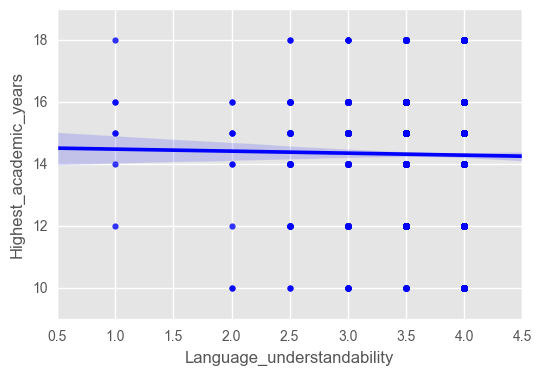

In [16]:
rat1_lm = smf.ols(formula = 'Highest_academic_years ~ Language_understandability', data =df_dropped).fit()
### rater 1 summary
langVSyears = sns.regplot(x= df_dropped['Language_understandability'].astype(float), y= df_dropped['Highest_academic_years'].astype(float), data=df_dropped, color = 'b')
print(rat1_lm.summary())

I used x value of Language_understandability, which was the average between English_understandability and non_English Language_understandability thinking that ability to understand languae would have correlation with overall language ability. However, there are no significant result between average of non-English language understandability and English language understandability with p value for Language_understandability being .447.

In [17]:
EngNonEng = smf.ols(formula = 'Highest_academic_years ~English_understandability - non_English_understandability  ', data =df_dropped).fit()
### rater 1 summary
print(rat1_lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Highest_academic_years   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.5795
Date:                    Mon, 06 Mar 2017   Prob (F-statistic):              0.447
Time:                            13:41:04   Log-Likelihood:                -5778.7
No. Observations:                    2853   AIC:                         1.156e+04
Df Residuals:                        2851   BIC:                         1.157e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------

The relationship of English_understandability - non_English_understandability was more significant than did the relatinship of Average of English_understandability and non_English_understandability. Relationship of English_understandability - non_English_understandabiliy ahd p value of 0.0 for both intercept and the y value, whereas the average had .445 of p value for y value. Although the coefficient is not strong, the language understandability and academic years seems to have correlation with each other.

In [18]:
df_dropped.to_csv('young.csv')
df.to_csv('data.csv')

'English_speakability','English_understandability','English_readability','English_writability',

('English_speakability',
 'English_understandability',
 'English_readability',
 'English_writability')

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.814
Date:                Mon, 06 Mar 2017   Prob (F-statistic):             0.0938
Time:                        13:41:05   Log-Likelihood:                -3541.4
No. Observations:                 843   AIC:                             7087.
Df Residuals:                     841   BIC:                             7096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               12.5425 

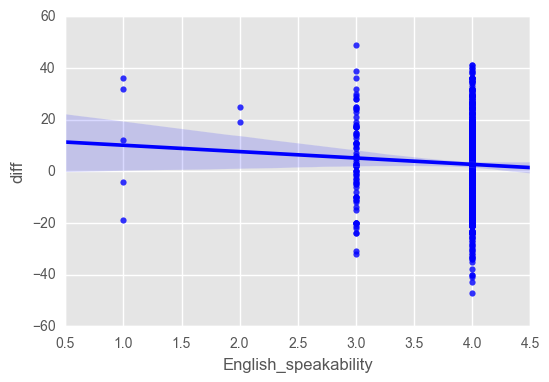

In [19]:
speak = smf.ols(formula = 'diff ~ English_speakability', data =df_three).fit()
mobSpeak = sns.regplot(x= df_three['English_speakability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(speak.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3019
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.583
Time:                        13:41:06   Log-Likelihood:                -3543.2
No. Observations:                 843   AIC:                             7090.
Df Residuals:                     841   BIC:                             7100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               6.3038    

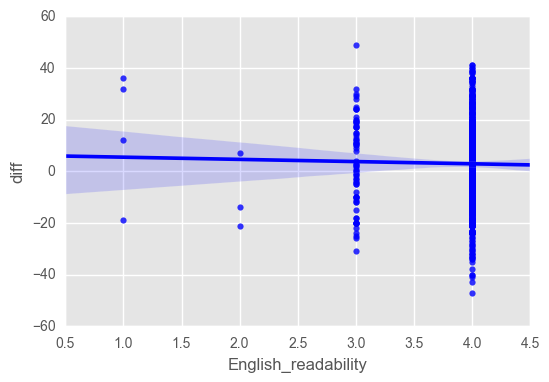

In [20]:
read = smf.ols(formula = 'diff ~ English_readability', data =df_three).fit()
mobRead = sns.regplot(x= df_three['English_readability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(read.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9311
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.335
Time:                        13:41:07   Log-Likelihood:                -3546.5
No. Observations:                 844   AIC:                             7097.
Df Residuals:                     842   BIC:                             7106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

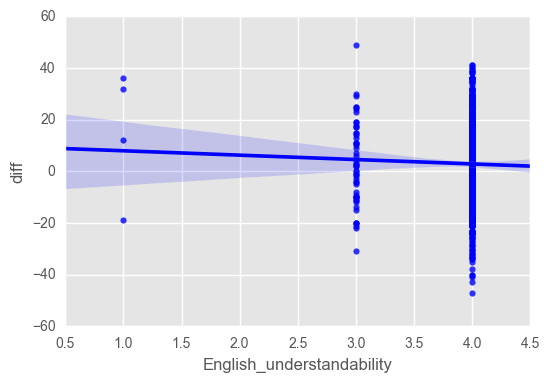

In [21]:
under = smf.ols(formula = 'diff ~ English_understandability', data =df_three).fit()
mobUnder = sns.regplot(x= df_three['English_understandability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(under.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07230
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.788
Time:                        13:41:08   Log-Likelihood:                -2972.8
No. Observations:                 708   AIC:                             5950.
Df Residuals:                     706   BIC:                             5959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               3.9947    

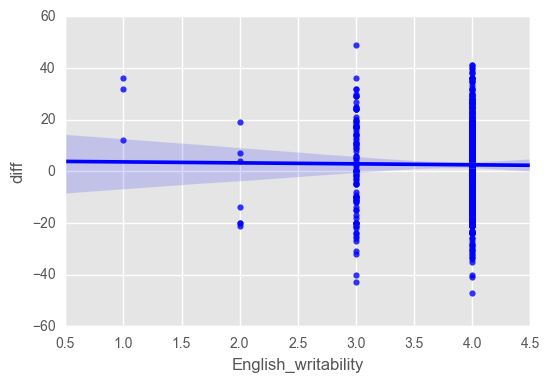

In [22]:
write = smf.ols(formula = 'diff ~ English_writability', data =df_three).fit()
mobWrite = sns.regplot(x= df_three['English_writability'], y= df_three['diff'], data=df_three, color = 'b')

### rater 1 summary
print(write.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.960
Date:                Mon, 06 Mar 2017   Prob (F-statistic):              0.162
Time:                        13:41:09   Log-Likelihood:                -2956.4
No. Observations:                 704   AIC:                             5917.
Df Residuals:                     702   BIC:                             5926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3104      7.021      1.753      0.0

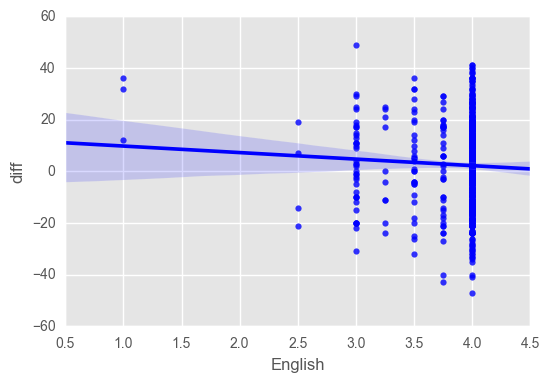

In [23]:
df_ddddd = df_three[np.isfinite(df_three['English'])]

eng = smf.ols(formula = 'diff ~ English', data =df_ddddd).fit()
mobeng = sns.regplot(x= df_ddddd['English'], y= df_ddddd['diff'], data=df_ddddd, color = 'b')

### rater 1 summary
print(eng.summary())

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     54.30
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           4.84e-13
Time:                        13:41:09   Log-Likelihood:                -2931.2
No. Observations:                 704   AIC:                             5866.
Df Residuals:                     702   BIC:                             5875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3486      0.788     -1.712      0.0

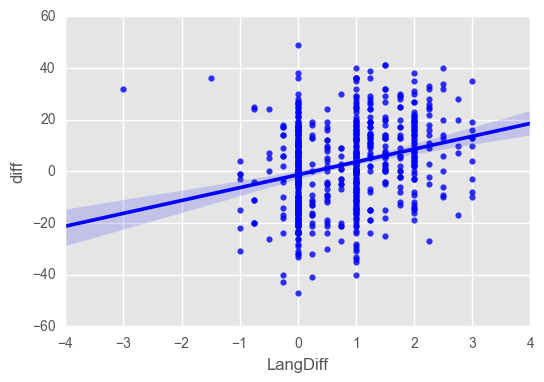

In [24]:
df_ddddd['LangDiff'] = df_ddddd.English - df_ddddd.ParentEnglish

eng = smf.ols(formula = 'diff ~ LangDiff', data =df_ddddd).fit()
mobeng = sns.regplot(x= df_ddddd['LangDiff'], y= df_ddddd['diff'], data=df_ddddd, color = 'b')

### rater 1 summary
print(eng.summary())

                            OLS Regression Results                            
Dep. Variable:            curJobScore   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     12.76
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           0.000374
Time:                        13:41:10   Log-Likelihood:                -3407.8
No. Observations:                 884   AIC:                             6820.
Df Residuals:                     882   BIC:                             6829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       40.4695      1.327     30.496   

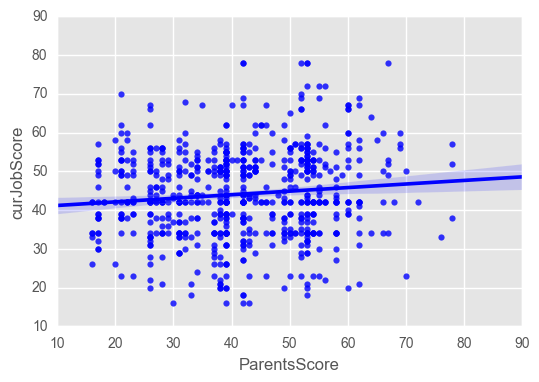

In [25]:

eng = smf.ols(formula = 'curJobScore ~ ParentsScore', data =df_three).fit()
mobeng = sns.regplot(x= df_ddddd['ParentsScore'], y= df_ddddd['curJobScore'], data=df_ddddd, color = 'b')

### rater 1 summary
print(eng.summary())

[  6.03521005e+00   8.45451426e-02   2.07630647e+00   8.45451426e-02
   6.03521005e+00   3.53990758e+00   2.90862497e-02   2.45747774e-01
   8.45451426e-02   8.45451426e-02   8.45451426e-02   6.03521005e+00
   5.09910852e+01   6.03521005e+00   3.53990758e+00   7.14316243e-01
   8.45451426e-02   1.75425742e+01   8.45451426e-02   3.53990758e+00
   8.45451426e-02   8.45451426e-02   1.02894665e+01   2.45747774e-01
   1.21784212e+00   6.03521005e+00   6.03521005e+00   1.21784212e+00
   6.03521005e+00   8.45451426e-02   7.14316243e-01   1.44141530e-01
   1.21784212e+00   8.45451426e-02   7.14316243e-01   1.21784212e+00
   8.45451426e-02   1.21784212e+00   7.14316243e-01   4.18976881e-01
   6.03521005e+00   7.14316243e-01   4.95893248e-02   3.53990758e+00
   8.45451426e-02   8.45451426e-02   8.45451426e-02   2.45747774e-01
   1.21784212e+00   8.45451426e-02   8.45451426e-02   6.03521005e+00
   6.03521005e+00   4.18976881e-01   8.45451426e-02   8.45451426e-02
   2.99084419e+01   8.45451426e-02

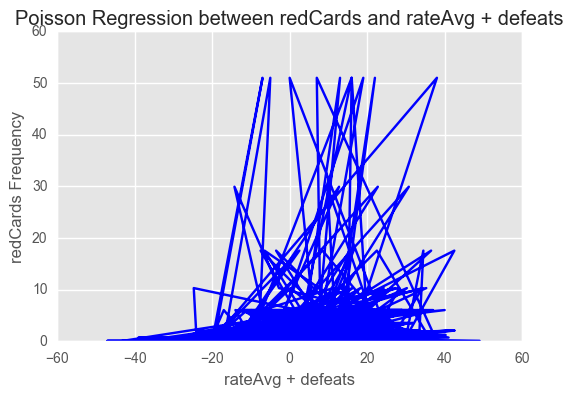

In [26]:
mod1 = smf.glm(formula = 'diff ~ LangDiff', data = df_ddddd, family = sm.families.Poisson()).fit()
predict1 = mod1.predict()

print(predict1)

#Research Question 1; Poisson relationship between redCards and rateAvg+ defeats
fig, ax = plt.subplots()
ax.set_title('Poisson Regression between redCards and rateAvg + defeats')
ax.set_xlabel('rateAvg + defeats')
ax.set_ylabel('redCards Frequency')
ax.plot(df_ddddd['diff'][0:predict1.size]+df_ddddd['LangDiff'][0:predict1.size], predict1, color = 'blue')
print(mod1.summary())

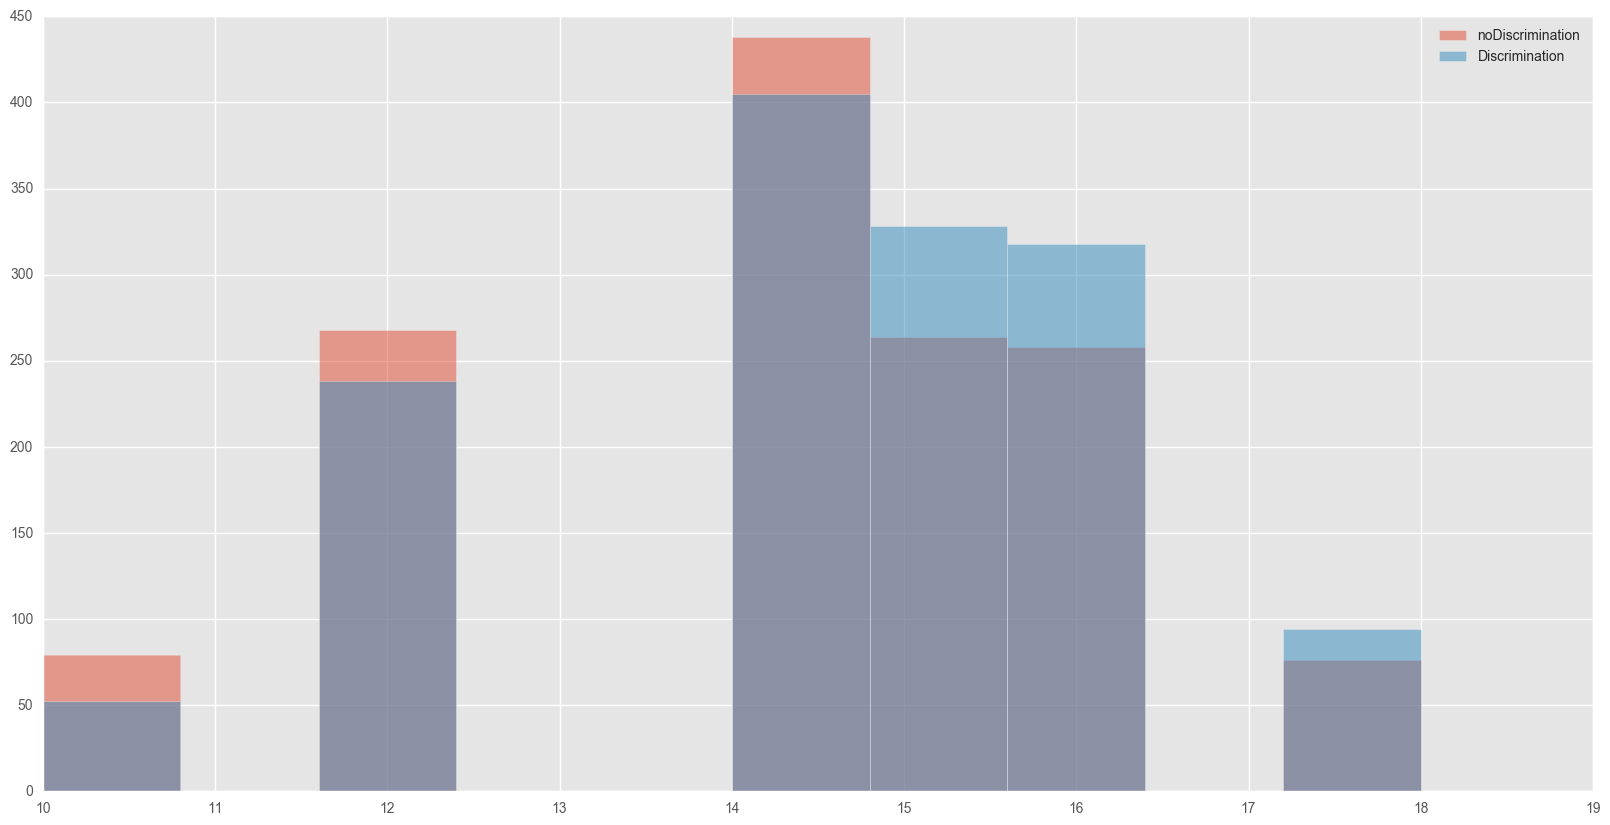

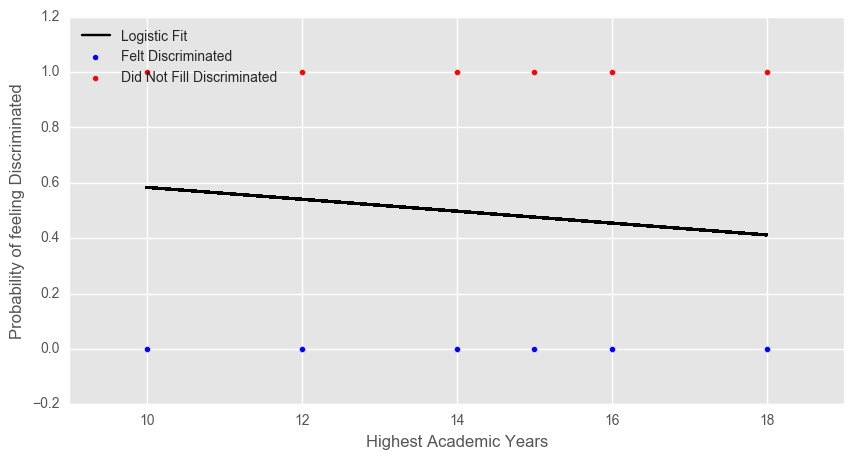

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Generalized Linear Model Regression Results                                   
================================================================================================================
Dep. Variable:     ['felt_discrimination[0]', 'felt_discrimination[1]']   No. Observations:                 2818
Model:                                                              GLM   Df Residuals:                     2816
Model Family:                                                  Binomial   Df Model:                            1
Link Function:                                                    logit   Scale:                             1.0
Method:                                                            IRLS   Log-Likelihood:                -1944.0
Date:                                                  Mon, 06 Mar 2017   Deviance:                       3888.0
Time:                                                          13:47:13   Pearson chi2:                 2.82e+03
No. Iterations:                                                       6                                         
==========================================================================================
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  1.2048      0.299      4.023      0.000         0.618     1.792
Highest_academic_years    -0.0867      0.021     -4.179      0.000        -0.127    -0.046
==========================================================================================
"""

In [30]:
df_dropped = df_dropped[(df_dropped.felt_discrimination != ' ')]
logistic_model = smf.glm(formula = 'felt_discrimination ~ Highest_academic_years', data=df_dropped, family=sm.families.Binomial()).fit()
discrimination = df_dropped[df_dropped['felt_discrimination'] == '1']
noDiscrimination = df_dropped[df_dropped['felt_discrimination'] == '0']


# Draw histograms of the distribution (perhaps overlapping histogram on the same chart)
plt.figure(figsize=(20,10))
plt.hist(noDiscrimination.Highest_academic_years, alpha=0.5, label='noDiscrimination')
plt.hist(discrimination.Highest_academic_years, alpha=0.5, label='Discrimination')
plt.legend(loc='upper right')
plt.show()


df_dropped['logistic_preds'] = logistic_model.predict()


# Visualize the predicted probabilities across balances (bonus: add the observed values as well)
df_dropped = df_dropped.sort_values(by='felt_discrimination') # sort values for graphic
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(noDiscrimination.Highest_academic_years, noDiscrimination.felt_discrimination, c='blue', label="Felt Discriminated")
ax.scatter(discrimination.Highest_academic_years, discrimination.felt_discrimination, c='red', label="Did Not Fill Discriminated")
ax.plot(df_dropped.Highest_academic_years, df_dropped.logistic_preds, c='black', label="Logistic Fit")
ax.legend(numpoints=1, loc='upper left')
ax.set_xlabel('Highest Academic Years')
ax.set_ylabel('Probability of feeling Discriminated')
plt.show()

logistic_model.summary()
